In [ ]:
from magic_gap import *
import matplotlib.pyplot as plt
import pickle

In [67]:
def majorana_magic_gap(j, M=10000, R=20):
    d = j_d(j)
    n = int(2*j)
    B = sym_qubit_basis(j)
    D = wh_operators(d)
    Dn = wh_operators(*[2]*n)
    avg_spinj_magic = (1 - d*(construct_Q(D) @ haar_moment(d, 4)).trace()).real
    avg_sep2j_magic = n*(1 - 2*(construct_Q(qudit_wh_operators(2)) @ haar_moment(2, 4)).trace()).real
    samples = np.array([np.mean([linear_stabilizer_entropy(B.conj().T @ rand_ket(d), Dn) for i in range(M)]) for r in range(R)])
    avg_sym2j_magic = np.mean(samples)
    avg_sym2j_magic_std = np.std(samples)
    return {"j": j, "avg_spinj_magic": avg_spinj_magic, "avg_sep2j_magic": avg_sep2j_magic,\
            "M": M, "avg_sym2j_magic": avg_sym2j_magic, "avg_sym2j_magic_std": avg_sym2j_magic_std}

In [78]:
j_max, M, R = 3.5, 10000, 10
j_values = np.arange(1/2, j_max, 1/2)
data = []
print("Linear stabilizer entropy (%d pure state samples | %d times)" % (M, R))
for j in j_values:
    result = majorana_magic_gap(j, M=M, R=R)
    print("j: %.1f" % j)
    print("\tavg_spinj_magic: %.5f" % result["avg_spinj_magic"])
    print("\tavg_sep2j_magic: %.5f" % result["avg_sep2j_magic"])
    print("\tavg_sym2j_magic: %.5f +/- %.5f" % (result["avg_sym2j_magic"], result["avg_sym2j_magic_std"]))

    data.append(result)
    with open('magic_gap.pkl', 'wb') as f:  
        pickle.dump(data, f)

Linear stabilizer entropy (10000 pure state samples | 10 times)
j: 0.5
	avg_spinj_magic: 0.20000
	avg_sep2j_magic: 0.20000
	avg_sym2j_magic: 0.20025 +/- 0.00080
j: 1.0
	avg_spinj_magic: 0.40000
	avg_sep2j_magic: 0.40000
	avg_sym2j_magic: 0.40015 +/- 0.00052
j: 1.5
	avg_spinj_magic: 0.48571
	avg_sep2j_magic: 0.60000
	avg_sym2j_magic: 0.60652 +/- 0.00120
j: 2.0
	avg_spinj_magic: 0.57143
	avg_sep2j_magic: 0.80000
	avg_sym2j_magic: 0.74830 +/- 0.00053
j: 2.5
	avg_spinj_magic: 0.61905
	avg_sep2j_magic: 1.00000
	avg_sym2j_magic: 0.84190 +/- 0.00052
j: 3.0
	avg_spinj_magic: 0.66667
	avg_sep2j_magic: 1.20000
	avg_sym2j_magic: 0.89836 +/- 0.00042


In [79]:
avg_spinj_magic = np.array([data[i]["avg_spinj_magic"] for i in range(len(j_values))])
avg_sep2j_magic = np.array([data[i]["avg_sep2j_magic"] for i in range(len(j_values))])
avg_sym2j_magic = np.array([data[i]["avg_sym2j_magic"] for i in range(len(j_values))])
avg_sym2j_magic_std = np.array([data[i]["avg_sym2j_magic_std"] for i in range(len(j_values))])

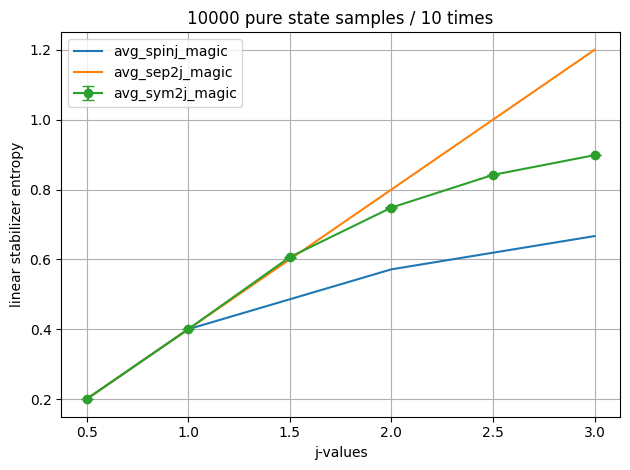

In [80]:
plt.plot(j_values, avg_spinj_magic, label='avg_spinj_magic')
plt.plot(j_values, avg_sep2j_magic, label='avg_sep2j_magic')
plt.errorbar(j_values, avg_sym2j_magic, yerr=avg_sym2j_magic_std, fmt='-o', capsize=4, label='avg_sym2j_magic')
plt.legend()
plt.title("%d pure state samples / %d times" % (M, R))
plt.xlabel("j-values")
plt.ylabel("linear stabilizer entropy")
plt.grid(True)
plt.tight_layout()
plt.show()